In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# from sklearn import 
from speedml import Speedml

In [9]:
# EDA分析
data = pd.read_csv('input/train.csv')

In [12]:
data.sample(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
162,163,0,3,"Bengtsson, Mr. John Viktor",male,26.0,0,0,347068,7.7750,NaN,S
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,1,29750,39.0000,NaN,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
735,736,0,3,"Williams, Mr. Leslie",male,28.5,0,0,54636,16.1000,NaN,S
768,769,0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.1500,NaN,Q
135,136,0,2,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.7500,NaN,Q
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 数据观察
+ 有5列为文本类型，需要进行数值化
+ Age,Cabin,Embarked 存在空值
+ Name 字段中称呼变量可供提取，需单独处理

In [16]:
# Unnumeric feature
unm_cols = [col for col in data.columns if data.dtypes[col] == 'object']
# data.dtypes[col] = 'object'
unm_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [64]:
# process Name
def pro_name(name):
    if name.find('Mr.') > -1:
        return 'Mr'
    elif name.find('Mrs.') > -1:
        return 'Mrs'
    elif name.find('Miss.') > -1:
        return 'Miss'
    elif name.find('Master.') > -1:
        return 'Master'
    elif name.find('Don.') > -1:
        return 'Don'
    elif name.find('Rev.') > -1:
        return 'Rev'
    elif name.find('Dr.') > -1:
        return 'Dr'
    else:
        return 'unknown'
    
def pro_name2(name):
    target = 'unknown'
    for seg in name.split(','):
        if seg.find('.') > -1:
            for seg2 in seg.split(' '):
                if seg2.find('.') > -1:
                    target = seg2.split('.')[0]
    return target

In [65]:
data['Name'+'_transformed'] = data['Name'].apply(pro_name2)

In [68]:
data[['Name','Name_transformed']]

,Name,Name_transformed
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
5,"Moran, Mr. James",Mr
6,"McCarthy, Mr. Timothy J",Mr
7,"Palsson, Master. Gosta Leonard",Master
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs
9,"Nasser, Mrs. Nicholas (Adele Achem)",Mrs


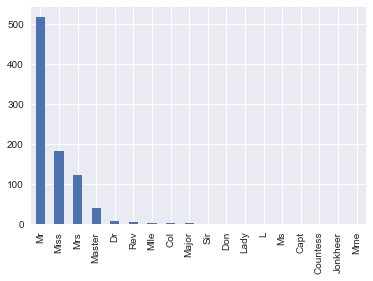

In [104]:
data.Name_transformed.value_counts().plot('bar')

In [90]:
data.Name_transformed.value_counts()

Mr          517
Miss        182
Mrs         124
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Sir           1
Don           1
Lady          1
L             1
Ms            1
Capt          1
Countess      1
Jonkheer      1
Mme           1
Name: Name_transformed, dtype: int64

In [121]:
# 将 Name_transformed 中 Mr,Miss,Mrs,Master之外的值统一记为others
data.loc[~data['Name_transformed'].isin(['Mr','Miss','Mrs','Master']),['Name_transformed']] = 'others'

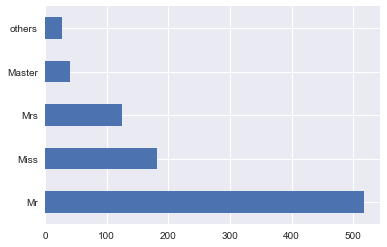

In [124]:
data.Name_transformed.value_counts().plot('barh')

## Ticket 不知道该如何处理，从特征中删除


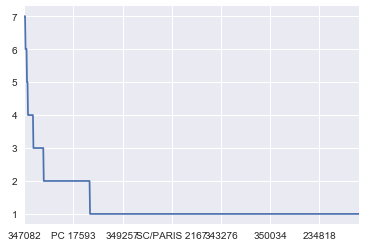

In [135]:
data.Ticket.value_counts().plot()

In [7]:
sml = Speedml('input/train.csv','input/test.csv',target='Pclass',uid='PassengerId')

In [8]:
sml.eda()

/Users/simon/anaconda/lib/python3.6/site-packages/speedml/__init__.py:146: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  if numerical_features != []:


,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Nulls,1014,Use feature.impute.
Outliers Upper,"[SibSp, Fare]",Positive skew (> 3). Use feature.outliers(upper).
Shape,"train (891, 11) | test (418, 10)",
Numerical Ratio,54%,Aim for 100% numerical.
Numerical High-cardinality,"[Age, Fare]",(>10) categories. Use feature.density
Numerical Categorical,"[Survived, Pclass, SibSp, Parch]",Use plot.ordinal.
Text High-cardinality,"[Ticket, Cabin]",(>10) categories. Use feature.labels.
Text Categorical,"[Sex, Embarked]",Use feature.labels or feature.mapping.
Text Unique,[Name],~80% unique. Use feature.extract or feature.drop.
